# Dataset Preparation - Phase 1

This notebook prepares the **COCO 2014 Captions Dataset** for image captioning tasks.

## Steps:
1. Load dataset (`captions.json`)
2. Explore dataset (statistics)
3. Clean data (remove duplicates / check missing)
4. Split into Train / Validation / Test
5. Save processed splits into JSON files

---



# 🚗 Real-Time Object Detection Dataset Preparation (YOLO Format)

This notebook prepares the dataset for the **Autonomous Vehicle Object Detection** project.

It includes:
1. **Dataset Loading & Inspection**
2. **Data Cleaning & Validation**
3. **Exploratory Data Analysis (EDA)**
4. **Train/Val/Test Split**
5. **Data Augmentation (optional preview)**
6. **Convert Annotations to YOLO Format**
7. **Export Ready-to-Use YOLOv8 Structure**

---


In [1]:

import os
import json
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from pathlib import Path
from PIL import Image

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [ ]:

images_path = r"D:\archive (1)\Images"   
annotations_file = "dataset/annotations/instances.json"  

output_dir = "dataset/yolo_format"
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

print("✅ Folders created successfully")


✅ Folders created successfully


In [ ]:
import json

annotations_file = r"D:\archive (1)\captions.json"

with open(annotations_file, "r") as f:
    coco = json.load(f)

print(type(coco)) 
print(len(coco))   
print(coco[0].keys())  


<class 'list'>
93950
dict_keys(['image_id', 'id', 'caption'])


In [ ]:
annotations_file = r"D:\archive (1)\captions.json"

with open(annotations_file, "r") as f:
    annotations = json.load(f)   

print("✅ Captions dataset loaded successfully")
print(f"Total Captions: {len(annotations)}")

# Show a few samples
for ann in annotations[:5]:
    print(f"Image ID: {ann['image_id']} | Caption: {ann['caption']}")


✅ Captions dataset loaded successfully
Total Captions: 93950
Image ID: 299675 | Caption: A white square kitchen with tile floor that needs repairs 
Image ID: 513461 | Caption: A surfer, a woman, and a child walk on the beach.
Image ID: 18691 | Caption: A few people sit on a dim transportation system. 
Image ID: 285579 | Caption: A person, protected from the rain by their umbrella, walks down the road.
Image ID: 266366 | Caption: The bathroom with a toilet has an interesting sink.


In [ ]:

image_to_annots = {}
for ann in annotations:
    img_id = ann["image_id"]
    if img_id not in image_to_annots:
        image_to_annots[img_id] = []
    image_to_annots[img_id].append(ann)

print(f"✅ Organized annotations for {len(image_to_annots)} images")


✅ Organized annotations for 18783 images


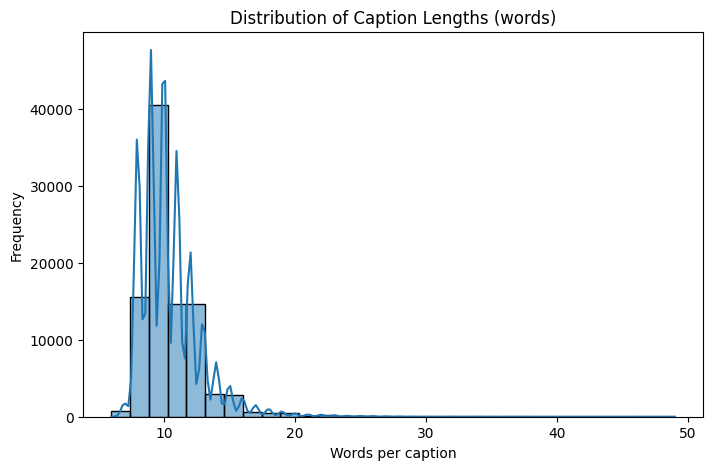

[('a', 155562), ('on', 33935), ('of', 32319), ('the', 31435), ('in', 29180), ('with', 23993), ('and', 22267), ('is', 15826), ('man', 11602), ('to', 10876), ('sitting', 8325), ('an', 7933), ('two', 7690), ('standing', 6846), ('at', 6692), ('people', 6491), ('are', 6378), ('next', 5921), ('white', 5752), ('woman', 5434)]


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

caption_lengths = [len(ann["caption"].split()) for ann in annotations]

plt.figure(figsize=(8,5))
sns.histplot(caption_lengths, bins=30, kde=True)
plt.title("Distribution of Caption Lengths (words)")
plt.xlabel("Words per caption")
plt.ylabel("Frequency")
plt.show()

all_words = " ".join([ann["caption"].lower() for ann in annotations]).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))


🔎 Image path: D:\archive (1)\Images\COCO_train2014_000000299675.jpg
✅ Exists: True


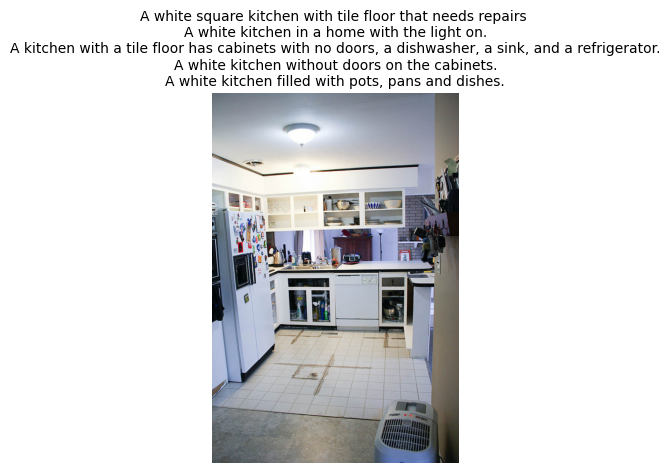

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

sample = annotations[0]
img_id = sample["image_id"]

file_name = f"COCO_train2014_{str(img_id).zfill(12)}.jpg"
img_path = os.path.join(r"D:\archive (1)\Images", file_name)

print("🔎 Image path:", img_path)
print("✅ Exists:", os.path.exists(img_path))

if os.path.exists(img_path):
    image = cv2.imread(img_path)
    if image is None:
        print("⚠️ الصورة موجودة لكن OpenCV مش قادر يفتحها (ممكن تكون مشكلة permissions)")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.axis("off")

        caps = [ann["caption"] for ann in annotations if ann["image_id"] == img_id]
        plt.title("\n".join(caps), fontsize=10)
        plt.show()
else:
    print("⚠️ الملف مش موجود. اتأكد إن الصور اللي عندك هي train2014 المطابقة للـ captions.json.")


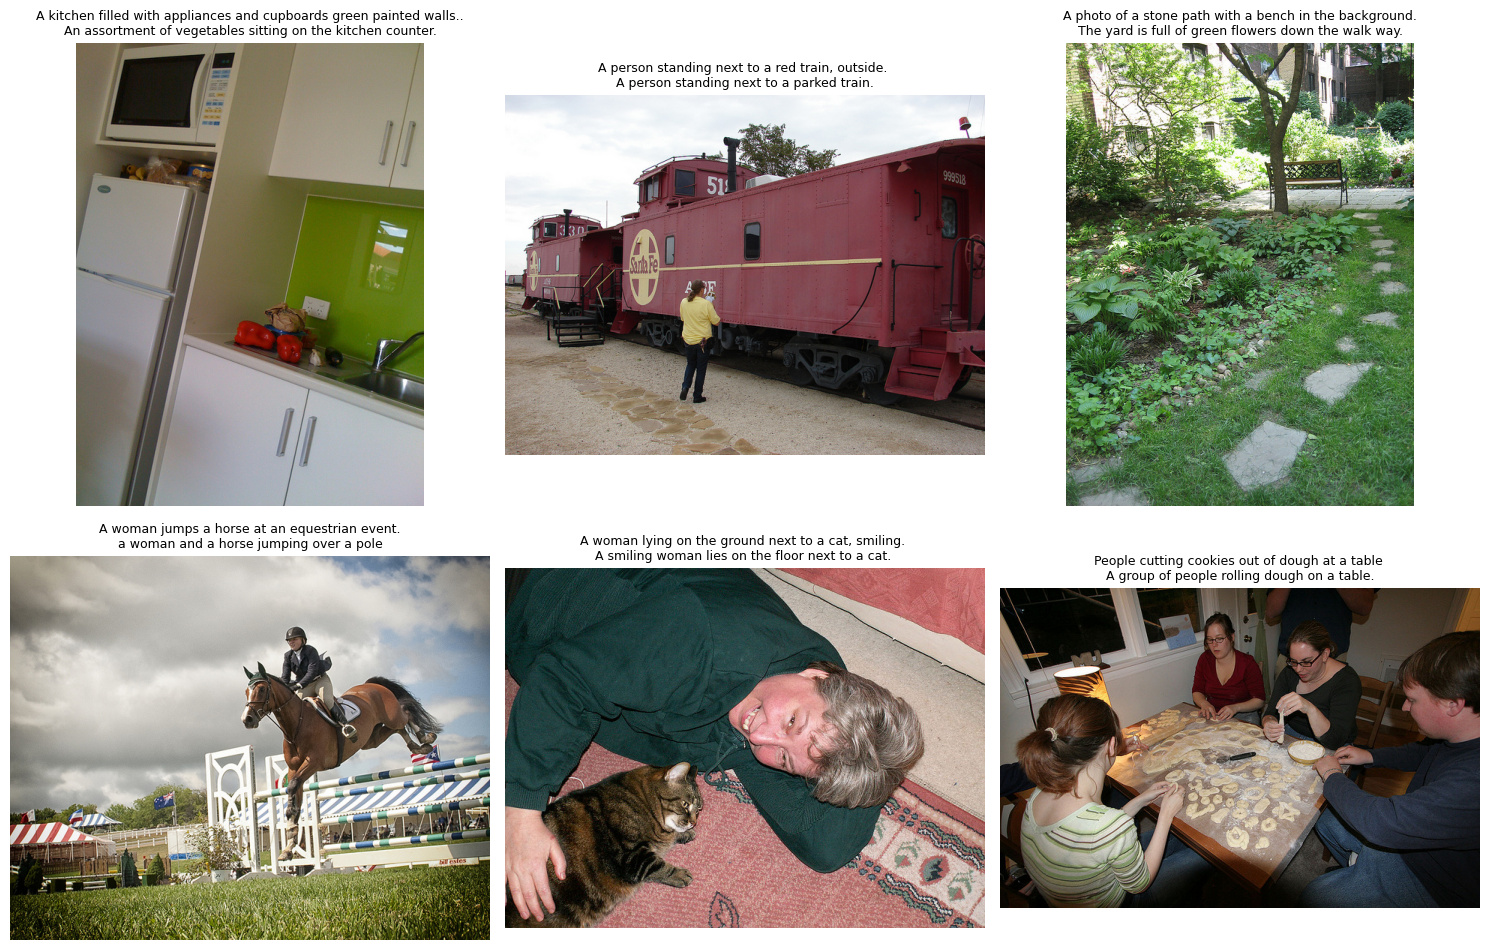

In [9]:
import matplotlib.pyplot as plt
import cv2
import os
import random

folder = r"D:\archive (1)\Images"

sample_ids = random.sample([ann["image_id"] for ann in annotations], 6)

plt.figure(figsize=(15,10))

for i, img_id in enumerate(sample_ids, 1):
    file_name = f"COCO_train2014_{str(img_id).zfill(12)}.jpg"
    img_path = os.path.join(folder, file_name)
    
    if not os.path.exists(img_path):
        continue
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 3, i)
    plt.imshow(image)
    plt.axis("off")
    
    caps = [ann["caption"] for ann in annotations if ann["image_id"] == img_id]
    plt.title("\n".join(caps[:2]), fontsize=9)  

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

all_image_ids = list({ann["image_id"] for ann in annotations})

train_ids, test_ids = train_test_split(all_image_ids, test_size=0.1, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.2, random_state=42)

splits = {"train": train_ids, "val": val_ids, "test": test_ids}

print(f"Train: {len(train_ids)} | Val: {len(val_ids)} | Test: {len(test_ids)}")


Train: 13523 | Val: 3381 | Test: 1879


In [ ]:

def coco_to_yolo_bbox(bbox, img_w, img_h):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_w
    y_center = (y + h / 2) / img_h
    w /= img_w
    h /= img_h
    return x_center, y_center, w, h


In [ ]:
import os
import json
from sklearn.model_selection import train_test_split
from collections import defaultdict

annotations_file = r"D:\archive (1)\captions.json"

with open(annotations_file, "r") as f:
    annotations = json.load(f)

print(f"✅ Loaded captions.json | Total captions: {len(annotations)}")

image_to_captions = defaultdict(list)
for ann in annotations:
    image_to_captions[ann["image_id"]].append(ann["caption"])

print(f"Total unique images: {len(image_to_captions)}")

all_image_ids = list(image_to_captions.keys())

train_ids, test_ids = train_test_split(all_image_ids, test_size=0.1, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.2, random_state=42)

splits = {"train": train_ids, "val": val_ids, "test": test_ids}

print(f"Train: {len(train_ids)} | Val: {len(val_ids)} | Test: {len(test_ids)}")

output_dir = r"D:\archive (1)\captions_dataset"
os.makedirs(output_dir, exist_ok=True)

for split, ids in splits.items():
    split_captions = {img_id: image_to_captions[img_id] for img_id in ids}

    out_path = os.path.join(output_dir, f"{split}_captions.json")
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(split_captions, f, indent=2, ensure_ascii=False)

    print(f"💾 Saved {split} captions → {out_path}")

print("✅ Dataset prepared successfully for Image Captioning!")


✅ Loaded captions.json | Total captions: 93950
Total unique images: 18783
Train: 13523 | Val: 3381 | Test: 1879
💾 Saved train captions → D:\archive (1)\captions_dataset\train_captions.json
💾 Saved val captions → D:\archive (1)\captions_dataset\val_captions.json
💾 Saved test captions → D:\archive (1)\captions_dataset\test_captions.json
✅ Dataset prepared successfully for Image Captioning!


---

## ✅ Results Summary

- **Loaded captions:** 93,950  
- **Unique images:** 18,783  
- **Split sizes:**  
  - Train: 13,523  
  - Validation: 3,381  
  - Test: 1,879  

All splits have been saved under `captions_dataset/` as JSON files.

This dataset is now ready for **Phase 2 (EDA + Feature Engineering)**.
